# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv('Height Weight Dataset.csv')
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # 3501 columns & 2 rows

(3501, 2)

# Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


# Define x and y

In [7]:
x = df[['Height']] # ind var
y = df['Weight']   # dep var

In [8]:
# x = df.drop(['Weight'], axis=1).values
# y = df['Weight'].values
# print(x)
# print(y)

# Split the dataset in training set & test set

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, test_size =.7,random_state=1)

In [10]:
xtrain

,Height
3045,70.968528
2364,69.742642
2932,67.724936
2783,72.297584
2397,66.558114
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [11]:
xtrain.shape 

(1050, 1)

In [12]:
xtrain.head()

,Height
3045,70.968528
2364,69.742642
2932,67.724936
2783,72.297584
2397,66.558114


In [13]:
ytrain

3045    183.196713
2364    199.891271
2932    180.051856
2783    212.058247
2397    154.627588
           ...    
2763    186.208566
905     175.093255
1096    224.440459
235     198.460249
1061    192.307027
Name: Weight, Length: 1050, dtype: float64

In [14]:
ytrain.shape

(1050,)

In [15]:
ytrain.head()

3045    183.196713
2364    199.891271
2932    180.051856
2783    212.058247
2397    154.627588
Name: Weight, dtype: float64

# Train the model on the training set

In [16]:
from sklearn.linear_model import LinearRegression

# ml = LinearRegression()
# ml.fit(xtrain, ytrain)

In [17]:
lr = LinearRegression() # creating object for linear model

In [18]:
lr.fit(xtrain, ytrain) # train the ML model; 

LinearRegression()

In [19]:
lr.coef_

array([5.97605415])

In [20]:
lr.intercept_

-225.68778390198432

In [21]:
m = lr.coef_
c = lr.intercept_

In [22]:
x = 73.847017
y = (m * x) + c
y

array([215.62598849])

# Predict the test set results

In [23]:
lr.predict([[73.847017]])

array([215.62598849])

In [24]:
lr.predict(df[['Height']])

array([215.62598861, 185.35659922, 217.19821895, ..., 216.01761216,
       177.07448576, 209.00423961])

In [25]:
df['Predicted Weight'] = lr.predict(df[['Height']]) # y=mx+c

In [26]:
df.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.625989
1,68.781904,162.310473,185.356599
2,74.110105,212.740856,217.198219
3,71.730978,220.042470,202.980427
4,69.881796,206.349801,191.929612


In [27]:
testing = lr.predict(xtest) # ytest
testing

array([177.11512478, 190.00673937, 167.59581338, ..., 215.43612225,
       204.09988273, 180.29327069])

In [28]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
156     179.907717
831     208.848847
1358    208.866034
2941    203.846582
502     166.435069
Name: Weight, Length: 2451, dtype: float64

In [29]:
xtest['pred'] = lr.predict(xtest)

In [30]:
xtest.head()

,Height,pred
719,67.402821,177.115125
2296,69.560033,190.006739
3083,65.809912,167.595813
1296,67.687531,178.816564
2234,65.077902,163.221282


# Evaluate the model

In [31]:
xtest = xtest[['Height']]

In [32]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
mse = mean_squared_error(ytest, pred) # testing error

In [33]:
mse

109.11724434757244

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, pred) #MAE

8.144275364945507

In [35]:
lr.predict([[74.110105]])

array([217.19821662])

# Plot the results

In [36]:
# best fit line : predicted results of xtest and x's result of xtest

Text(0.5, 1.0, 'Height-Weight in Linear Regression')

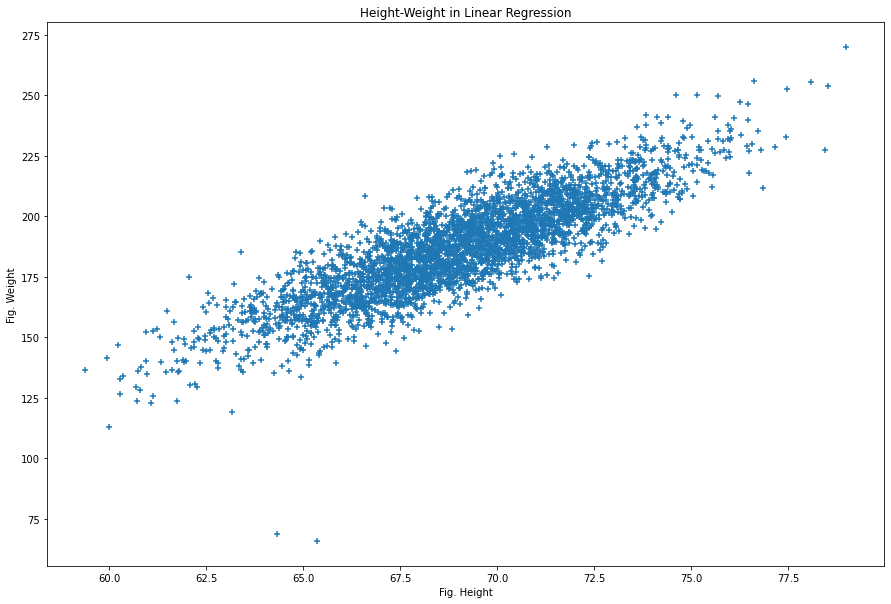

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(df.Height, df.Weight, marker='+')
plt.xlabel('Fig. Height')
plt.ylabel('Fig. Weight')
plt.title('Height-Weight in Linear Regression')

Text(0.5, 1.0, 'Height-Weight in Linear Regression')

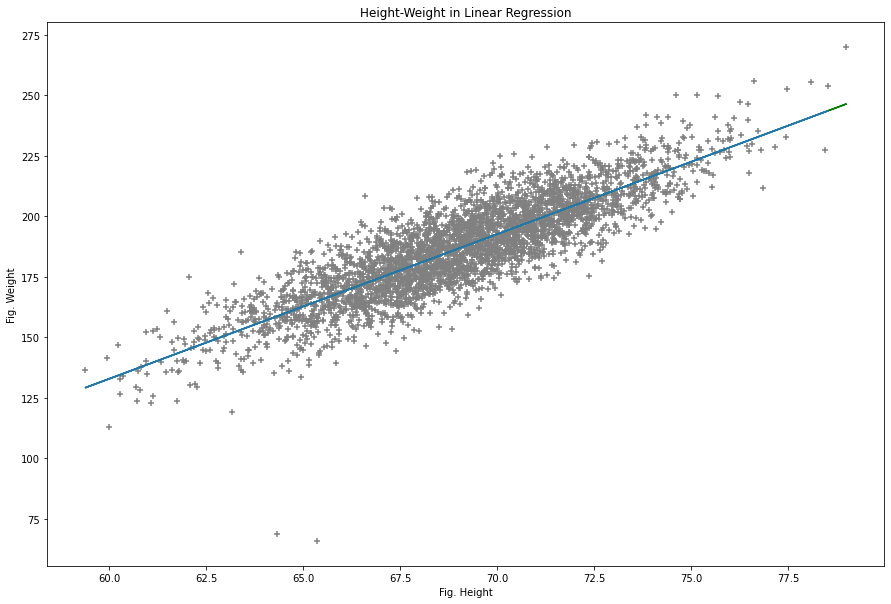

In [38]:
plt.figure(figsize=(15,10))
plt.scatter(df['Height'], df['Weight'], color='gray', marker='+')
plt.plot(df[['Height']], lr.predict(df[['Height']]), color='green')  #..?
plt.plot(xtest, lr.predict(xtest))
plt.xlabel('Fig. Height')
plt.ylabel('Fig. Weight')
plt.title('Height-Weight in Linear Regression')


In [39]:
df.Height.mean() # average of total height

69.02441087268797

In [40]:
df.Weight.mean() # average of total weight

186.89125797946284

# Percentage of Accuracy 

In [41]:
lr.score(xtest, ytest) # R Squared Value

0.7319318916534414

In [42]:
lr.score(df[['Height']], df.Weight) # R Squared Value 

0.7323336474376801

In [43]:
lr.score(xtrain, ytrain) # R Squared Value ; training accuracy

0.7333630970543594